# Project Overview

This project explores the relationships between the physical and genetic characteristics of various soybean cultivars and two main indicators of productivity: thousand seed weight (MHG) and grain yield (GY). This project aims to develop predictive models for MHG and to identify clusters of cultivars with similar characteristics, thereby improving the selection of cultivars and cultivation practice, using a dataset that includes information on plant characteristics, as well as climatic conditions and soil properties from the data documentation.

## Table of Contents

1. **Data Description**: A detailed description of the dataset and variables.
2. **Data Preprocessing**: The methods used for cleaning and preparing the data for analysis.
3. **Exploratory Data Analysis (EDA)**: Exploring distributions, correlations, and patterns in the data.
4. **Predictive Modeling for MHG**:
    - Creating synthetic data for testing.
    - Selection and training of models.
    - Experimentation and hyper-parameter tuning.
5. **Clustering of Soybean Cultivars**: Techniques and results of clustering.
6. **Evaluation and Comparison of Models**: Methods and metrics for evaluation.
7. **Conclusions**: Summarizing findings and recommendations for agricultural practices.

## Problem-Solving Approach

The project adopts a two-stage approach to addressing the specified problems:

Firstly, a detailed exploratory analysis will be conducted to understand the correlations between variables and their impact on MHG and GY. This stage aims to address the following key questions:

1. What are the most important factors in determining MHG (Thousand seed weight)?
2. What are the most important factors in determining GY (Grain yield)?
3. What is the delta in MHG and GY from Season 1 to Season 2?

Secondly, the focus will be on developing the predictive model for MHG, using existing data and synthetic datasets generated to test the model's ability to generalize. Machine learning algorithms will be explored, with the best-performing models selected based on specific metrics.

In parallel, the project will implement clustering techniques to identify groups of soybean cultivars with similar characteristics, facilitating a deep understanding of genetic diversity and production potential.


# 1.Data description

The dataset for this project encompasses a collection of measurements and characteristics of soybean plants cultivated across two different planting seasons. The data includes information on physical plant traits, production performance, details about the cultivated soybean varieties, as well as data on environmental conditions and soil properties where the plants were grown.

## Dataset Variables

### data/data.csv

- **Season**: A numeric indicator (1 or 2) distinguishing between the two planting seasons for which data were collected. This variable reflects different timing and possible climatic variations between seasons.

- **Cultivar**: Categorical names of the 40 soybean varieties planted. Each variety possesses its own genetic characteristics that can influence growth, development, and yield.

- **Repetition**: The number of replications (1-4) for each variety in each season, indicating that data for each variety and season were collected multiple times to ensure the reliability of the results.

- **PH (Plant Height)**: The height of the plant measured in centimeters (cm), from the soil surface to the insertion of the last leaf.

- **IFP (Insertion of the First Pod)**: The height from the soil to the first pod of the plant, measured in centimeters (cm).

- **NLP (Number of Stems)**: The number of stems per plant, determined through manual counting.

- **NGP (Number of Legumes per Plant)**: The number of pods per plant, determined through manual counting.

- **NGL (Number of Grains per Plant)**: The total number of grains produced by a plant, determined through manual counting.

- **NS (Number of Grains per Pod)**: The number of grains found in a single pod, determined through manual counting.

- **MHG (Thousand Seed Weight)**: The weight, in grams (g), of a thousand seeds, used as an indicator of the size and quality of the seeds.

- **GY (Grain Yield)**: The grain production, expressed in kilograms per hectare (kg/ha), standardized to a grain moisture level of 13%.

### data/cultivars-description.ods

- **Cultivars (Varieties)**

- **Maturation Group**

- **Seeds per Meter/Linear**

- **Density per Meter/Linear**


## Additional Data

- **Precipitation and Average Temperature**: Level of precipitation and the average temperature during the two planting seasons.

![Precipitation and Average Temperature](data/hum_temp.png)

- **Chemical Soil Properties**

![Chemical Soil Properties](data/chem.png)


# 2.Data Preprocessing

In [1]:
import pandas as pd

In [54]:
data_path = 'data/data.csv'
cultivars_description_path = 'data/cultivars-description.ods'

data_df = pd.read_csv(data_path)
cultivars_description_df = pd.read_excel(cultivars_description_path, engine='odf')

In [4]:
data_df.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [5]:
cultivars_description_df.head()

,Cultivars,Maturation group,Seeds per meter/linear,Density per meter/linear
0,FTR 3190 IPRO,9.0,12.5,250000
1,FTR 4288 IPRO,8.8,11.0,220000
2,NK 8770 IPRO,8.7,16.0,320000
3,M 8606I2X,8.6,10.0,200000
4,M 8644 IPRO,8.6,11.0,220000


In [12]:
data = {
    'Month': ['November', 'December', 'January', 'February', 'March', 'April'],
    'Precipitation_2022_23_mm': [365, 600, 560, 365, 520, 750],
    'Precipitation_1991_2020_mm': [350, 295, 310, 405, 430, 405],
    'Temperature_2022_23_C': [25.55, 25.75, 25.1, 25.2, 26.25, 24.59],
    'Temperature_1991_2020_C': [25.49, 25.5, 25.5, 25.12, 24.55, 25.12]
}

weather_df = pd.DataFrame(data)

In [13]:
weather_df.head()

,Month,Precipitation_2022_23_mm,Precipitation_1991_2020_mm,Temperature_2022_23_C,Temperature_1991_2020_C
0,November,365,350,25.55,25.49
1,December,600,295,25.75,25.50
2,January,560,310,25.10,25.50
3,February,365,405,25.20,25.12
4,March,520,430,26.25,24.55


# 3. Exploratory Data Analysis 

In the dataset paper the is already an dataset summary.
![Dataset summary](data/data_summary.png)

Almost all mean and median variations don't tend to have big differences. This might suggest that there are no extreme factors significantly affecting the yield or seed weight. It also suggests that there are not many outliers in the data.

 TSW and GY show a wide range of values ​​with a significant standard deviation, suggesting variation in seed weight and grain yield among different soybean cultivars and seasons.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

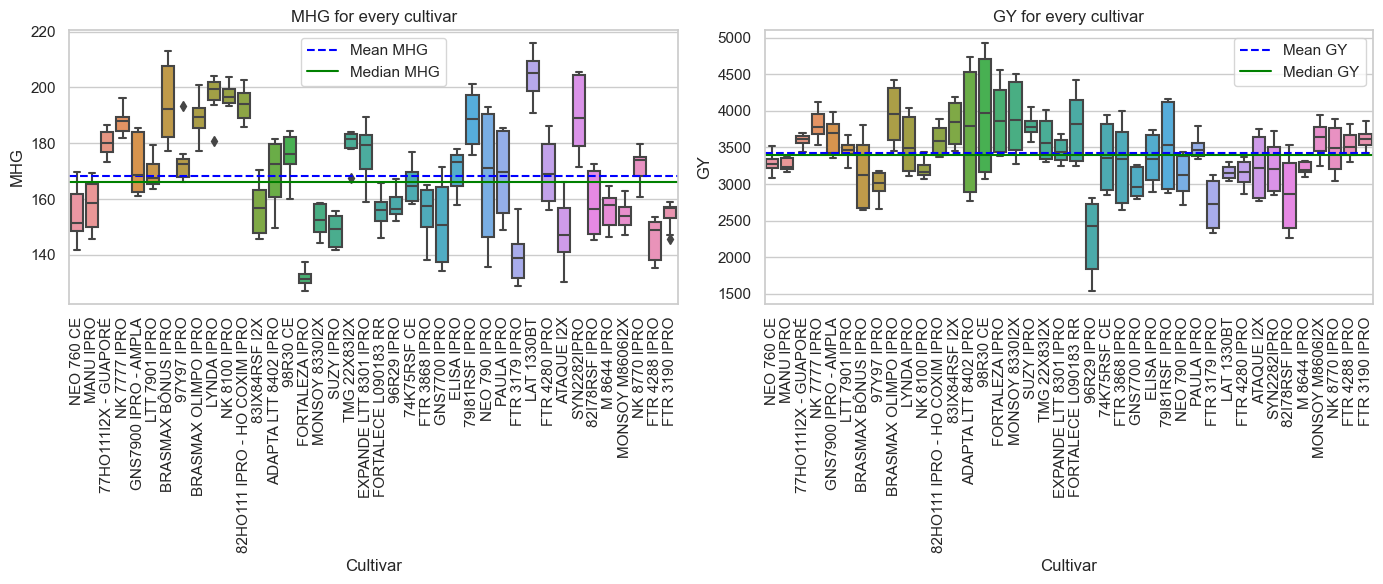

In [63]:
mean_MHG = 168.32
median_MHG = 166.15
mean_GY = 3418.55
median_GY = 3397.27

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Cultivar', y='MHG', data=data_df, ax=ax[0])
ax[0].axhline(mean_MHG, color='blue', linestyle='--', label='Mean MHG')
ax[0].axhline(median_MHG, color='green', linestyle='-', label='Median MHG')
ax[0].set_title('MHG for every cultivar')
ax[0].set_xticklabels(data_df['Cultivar'].unique(), rotation=90)
ax[0].set_xlabel('Cultivar')
ax[0].set_ylabel('MHG')
ax[0].legend()

sns.boxplot(x='Cultivar', y='GY', data=data_df, ax=ax[1])
ax[1].axhline(mean_GY, color='blue', linestyle='--', label='Mean GY')
ax[1].axhline(median_GY, color='green', linestyle='-', label='Median GY')
ax[1].set_title('GY for every cultivar')
ax[1].set_xticklabels(data_df['Cultivar'].unique(), rotation=90)
ax[1].set_xlabel('Cultivar')
ax[1].set_ylabel('GY')
ax[1].legend()

plt.tight_layout()
plt.show()

Some varieties have performed well or less well according to the measured metrics, even though the seed weight was not impressive, the final yield was still remarkable. Given this discrepancy, I believe that cultivars that have not shown satisfactory performance in terms of GY (Grain Yield) or MHG (Mean Hundred Grain Weight) should not be considered for future planting.

Some crops exhibit a considerable dispersion of values, suggesting they were affected by certain factors. What could these be?

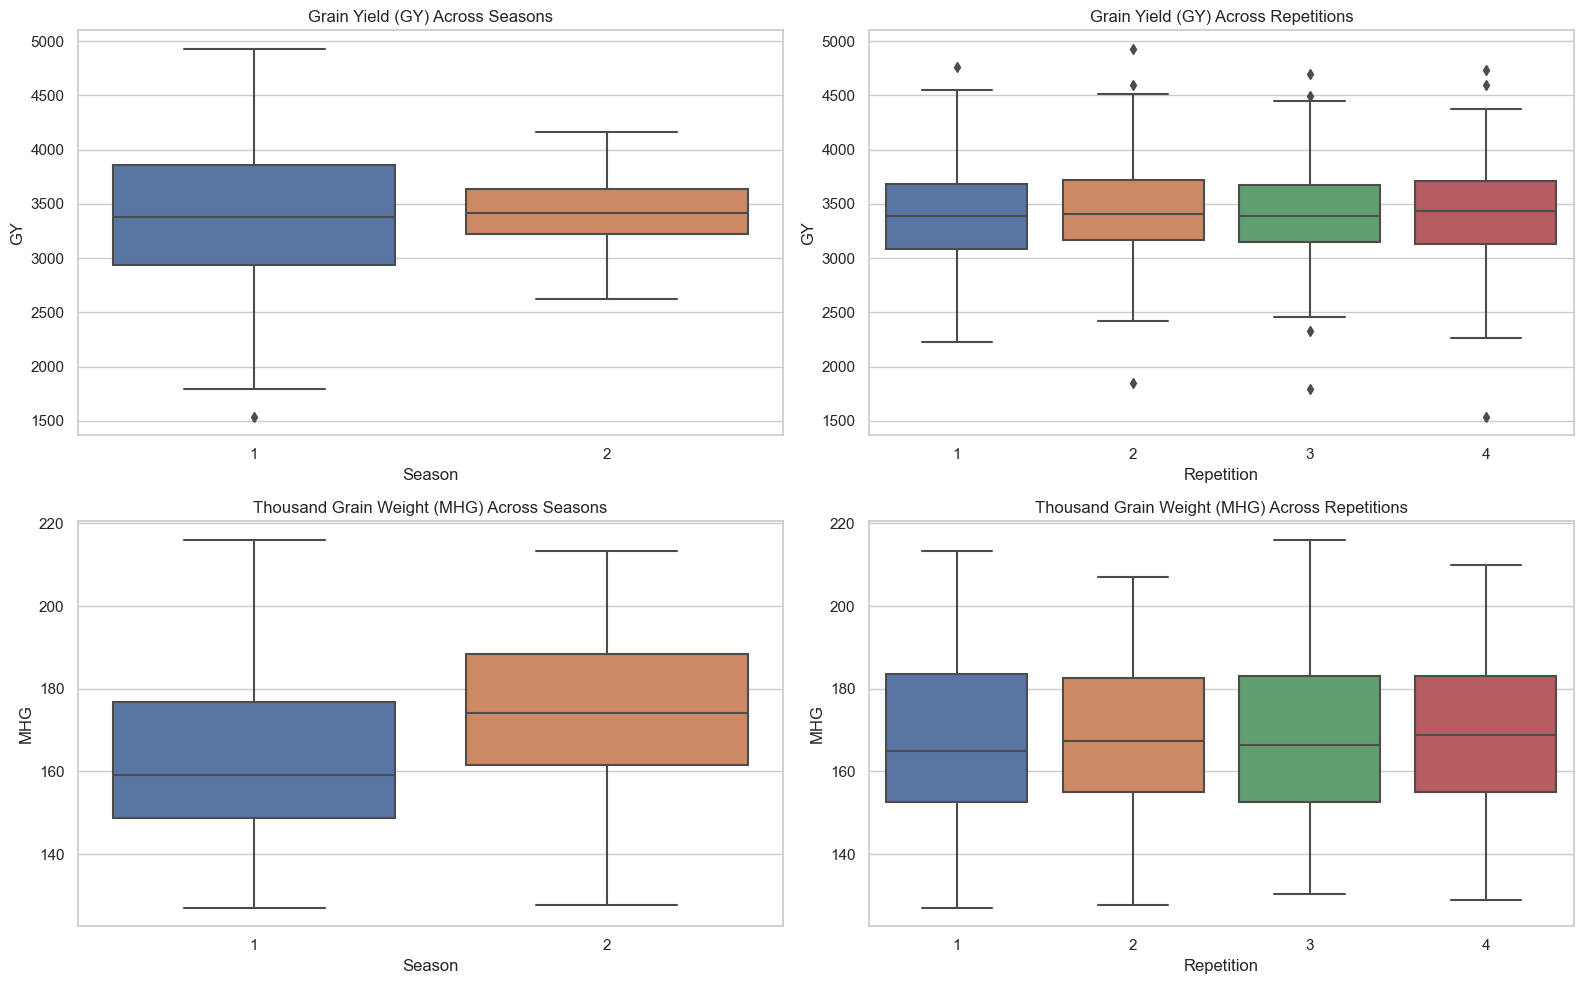

In [68]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Season', y='GY', data=data_df)
plt.title('Grain Yield (GY) Across Seasons')

plt.subplot(2, 2, 2)
sns.boxplot(x='Repetition', y='GY', data=data_df)
plt.title('Grain Yield (GY) Across Repetitions')

plt.subplot(2, 2, 3)
sns.boxplot(x='Season', y='MHG', data=data_df)
plt.title('Thousand Grain Weight (MHG) Across Seasons')

plt.subplot(2, 2, 4)
sns.boxplot(x='Repetition', y='MHG', data=data_df)
plt.title('Thousand Grain Weight (MHG) Across Repetitions')

plt.tight_layout()
plt.show()



there's a favorable tendency for Season 2, suggesting it might be more productive. Furthermore, the analysis of data gathered from various repetitions indicates that these were collected at the same time, as there are no significant deviations observed among them.

C:\Users\cdora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cdora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cdora\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\cdora\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

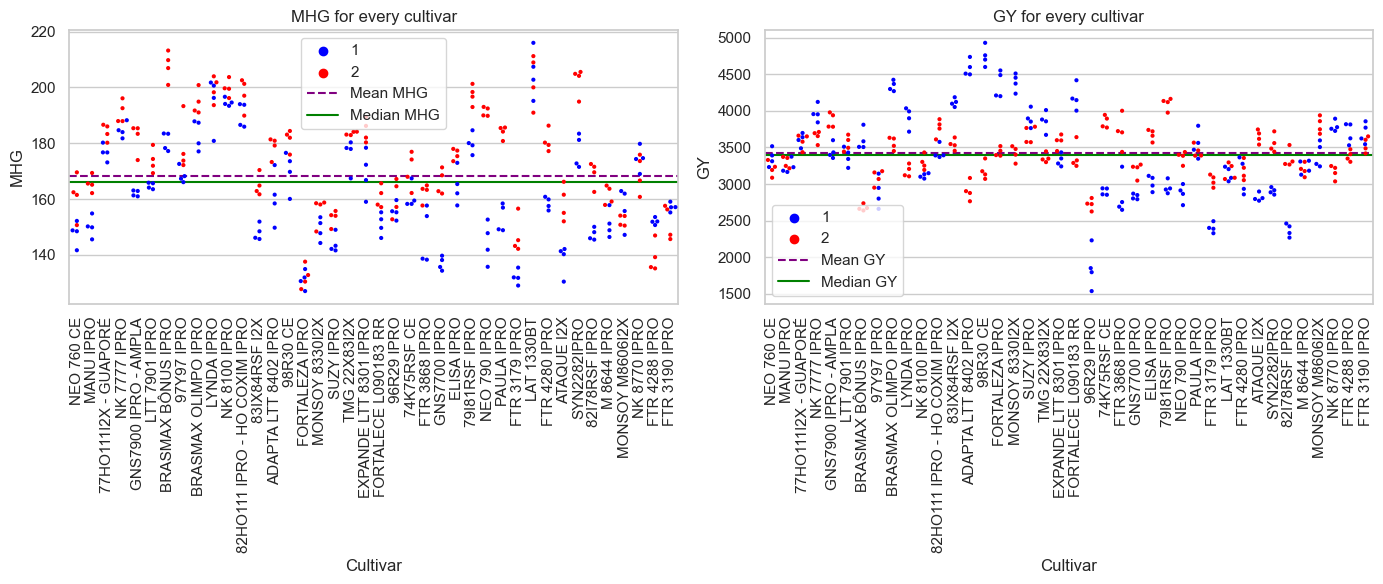

In [64]:
mean_MHG = 168.32
median_MHG = 166.15
mean_GY = 3418.55
median_GY = 3397.27

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

unique_cultivars = data_df['Cultivar'].unique()
x_ticks = range(len(unique_cultivars))

# MHG
sns.swarmplot(x='Cultivar', y='MHG', data=data_df, hue='Season', palette={1: 'blue', 2: 'red'}, ax=ax[0], order=unique_cultivars, size=3)
ax[0].axhline(mean_MHG, color='purple', linestyle='--', label='Mean MHG')
ax[0].axhline(median_MHG, color='green', linestyle='-', label='Median MHG')
ax[0].set_title('MHG for every cultivar')
ax[0].set_xticks(x_ticks)
ax[0].set_xticklabels(unique_cultivars, rotation=90)
ax[0].set_xlabel('Cultivar')
ax[0].set_ylabel('MHG')
ax[0].legend()

# GY
sns.swarmplot(x='Cultivar', y='GY', data=data_df, hue='Season', palette={1: 'blue', 2: 'red'}, ax=ax[1], order=unique_cultivars, size=3)
ax[1].axhline(mean_GY, color='purple', linestyle='--', label='Mean GY')
ax[1].axhline(median_GY, color='green', linestyle='-', label='Median GY')
ax[1].set_title('GY for every cultivar')
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(unique_cultivars, rotation=90)
ax[1].set_xlabel('Cultivar')
ax[1].set_ylabel('GY')
ax[1].legend()

plt.tight_layout()
plt.show()


The majority of plants exhibiting a wide dispersion of Mille Yield (MY) values had these values clustered according to the season in which they were planted.

Additionally, we notice that certain varieties show minimal variations in their traits, suggesting a potential increased resilience to weather condition fluctuations, given that they were planted at different times.

In [81]:
data_numeric = data_df.drop('Cultivar', axis=1)
correlation_matrix = data_numeric.corr()
correlation_matrix

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
Season,1.000000e+00,1.725361e-16,0.268523,-0.337796,0.056059,-0.002469,-0.010543,-0.506016,0.307912,-0.019710
Repetition,1.725361e-16,1.000000e+00,0.001455,0.016847,0.000194,0.011717,0.015945,-0.006465,0.013688,-0.005697
PH,2.685229e-01,1.454702e-03,1.000000,0.325370,0.172737,0.063474,-0.081961,-0.048734,-0.046618,0.123281
IFP,-3.377963e-01,1.684695e-02,0.325370,1.000000,0.053085,-0.057423,-0.151598,0.344360,-0.071123,0.139090
NLP,5.605933e-02,1.939016e-04,0.172737,0.053085,1.000000,0.681794,-0.062122,0.521903,-0.000687,0.198741
NGP,-2.469477e-03,1.171739e-02,0.063474,-0.057423,0.681794,1.000000,0.621507,0.359697,0.032085,0.238883
NGL,-1.054330e-02,1.594473e-02,-0.081961,-0.151598,-0.062122,0.621507,1.000000,-0.073567,0.051604,0.077404
NS,-5.060156e-01,-6.464545e-03,-0.048734,0.344360,0.521903,0.359697,-0.073567,1.000000,-0.129252,0.167022
MHG,3.079121e-01,1.368809e-02,-0.046618,-0.071123,-0.000687,0.032085,0.051604,-0.129252,1.000000,0.074552
GY,-1.970989e-02,-5.696533e-03,0.123281,0.139090,0.198741,0.238883,0.077404,0.167022,0.074552,1.000000


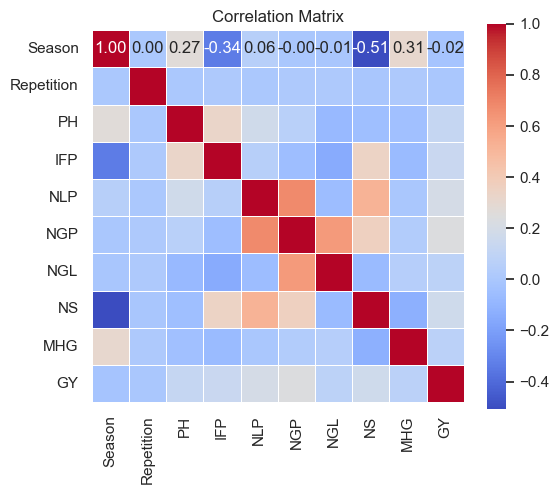

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()


In [92]:
print(sns.__version__)

0.12.2


Given the wide distribution for most varieties, this leads me to think that there might be differences due to the fact that the plants were planted differently and experienced different humidity and temperature at various stages of their development.
I will proceed with joining the weather data with the cultivars data and explore their correlations.

In [84]:
correlations_mhg_gy = correlation_matrix.loc[['MHG', 'GY'], :]
correlations_mhg_gy

,Season,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
MHG,0.307912,0.013688,-0.046618,-0.071123,-0.000687,0.032085,0.051604,-0.129252,1.000000,0.074552
GY,-0.019710,-0.005697,0.123281,0.139090,0.198741,0.238883,0.077404,0.167022,0.074552,1.000000


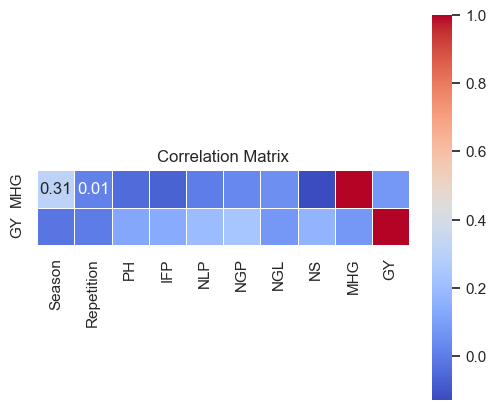

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(correlations_mhg_gy, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5)

plt.title('Correlation Matrix')
plt.show()


In [14]:
display(weather_df)

,Month,Precipitation_2022_23_mm,Precipitation_1991_2020_mm,Temperature_2022_23_C,Temperature_1991_2020_C
0,November,365,350,25.55,25.49
1,December,600,295,25.75,25.50
2,January,560,310,25.10,25.50
3,February,365,405,25.20,25.12
4,March,520,430,26.25,24.55
5,April,750,405,24.59,25.12


In [25]:
climate_mapping = weather_df.set_index('Month').T.to_dict('list')
print(climate_mapping)

{'November': [365.0, 350.0, 25.55, 25.49], 'December': [600.0, 295.0, 25.75, 25.5], 'January': [560.0, 310.0, 25.1, 25.5], 'February': [365.0, 405.0, 25.2, 25.12], 'March': [520.0, 430.0, 26.25, 24.55], 'April': [750.0, 405.0, 24.59, 25.12]}


In [26]:
climate_mapping = weather_df.set_index('Month').T.to_dict('list')

for i in range(1, 6):  # 5 months for every cultivation season
    data_df[f'temp_month{i}'] = 0.0
    data_df[f'pp_month{i}'] = 0.0

for index, row in test.iterrows():
    if row['Season'] == 1:
        # Sezonul 1 corespunde cu lunile noiembrie - martie
        months = ['November', 'December', 'January', 'February', 'March']
    else:
        # Sezonul 2 corespunde cu lunile decembrie - aprilie
        months = ['December', 'January', 'February', 'March', 'April']
    
    for i, month in enumerate(months, start=1):
        data_df.at[index, f'pp_month{i}'] = climate_mapping[month][0]  # Indexul 0 pentru precipitațiile curente
        data_df.at[index, f'temp_month{i}'] = climate_mapping[month][2]  # Indexul 2 pentru temperatura curentă
        


In [27]:
display(data_df)

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,...,temp_month1,pp_month1,temp_month2,pp_month2,temp_month3,pp_month3,temp_month4,pp_month4,temp_month5,pp_month5
0,1,NEO 760 CE,1,58.80,15.20,98.20,177.80,1.81,5.20,152.20,...,25.55,365.0,25.75,600.0,25.1,560.0,25.20,365.0,26.25,520.0
1,1,NEO 760 CE,2,58.60,13.40,102.00,195.00,1.85,7.20,141.69,...,25.55,365.0,25.75,600.0,25.1,560.0,25.20,365.0,26.25,520.0
2,1,NEO 760 CE,3,63.40,17.20,100.40,203.00,2.02,6.80,148.81,...,25.55,365.0,25.75,600.0,25.1,560.0,25.20,365.0,26.25,520.0
3,1,NEO 760 CE,4,60.27,15.27,100.20,191.93,1.89,6.40,148.50,...,25.55,365.0,25.75,600.0,25.1,560.0,25.20,365.0,26.25,520.0
4,1,MANU IPRO,1,81.20,18.00,98.80,173.00,1.75,7.40,145.59,...,25.55,365.0,25.75,600.0,25.1,560.0,25.20,365.0,26.25,520.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2,FTR 4288 IPRO,4,88.33,16.33,75.73,139.00,1.84,3.67,135.19,...,25.75,600.0,25.10,560.0,25.2,365.0,26.25,520.0,24.59,750.0
316,2,FTR 3190 IPRO,1,64.40,16.60,76.00,168.00,2.21,3.60,145.69,...,25.75,600.0,25.10,560.0,25.2,365.0,26.25,520.0,24.59,750.0
317,2,FTR 3190 IPRO,2,64.60,17.60,116.80,271.20,2.32,3.80,147.24,...,25.75,600.0,25.10,560.0,25.2,365.0,26.25,520.0,24.59,750.0
318,2,FTR 3190 IPRO,3,58.80,14.80,86.40,180.60,2.09,2.20,156.32,...,25.75,600.0,25.10,560.0,25.2,365.0,26.25,520.0,24.59,750.0


# Exploratory Data Analysis